#7-1. 인공 신경망
: 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘

- MNIST 데이터셋: 머신러닝에서 붓꽃 데이터셋이 유명하듯이 딥러닝에서 뮤영한 데이터셋이다. 이 데이터는 0~9까지 손으로 쓴 숫자로 이루어져 있다.

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- load_data() 함수는 훈련 데이터와 테스트 데이터를 나누어 반환한다.

In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


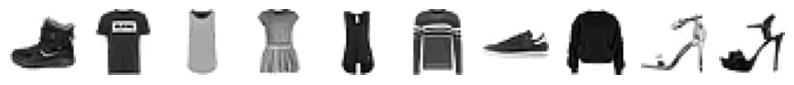

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10,figsize=(10,10)) #그래프 쌓기
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')#담겨진 그래프
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


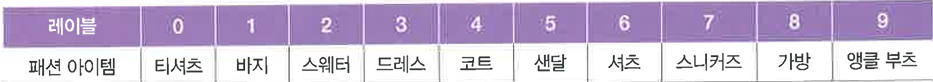

In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


- 반복 횟수를 늘려도 성능이 크게 향상되지는 않는다.
 - 0.8303833... -> max_iter = 9
 - 0.8436999... -> max_iter = 20

- 확률적 경사 하강법, 로지스틱 회귀 모델이 가장 간단한 인공 신경망이다.

- 인공신경망
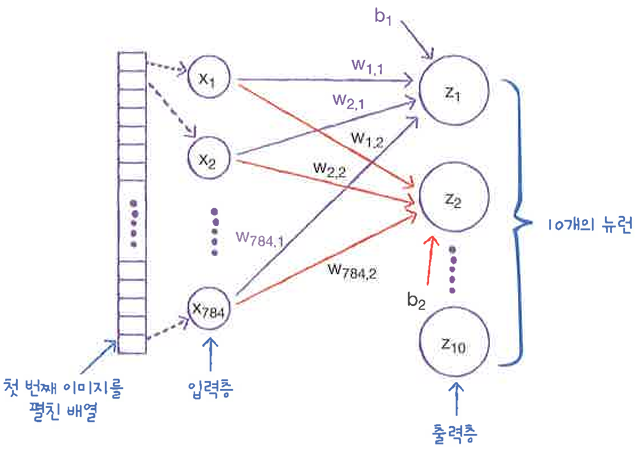

##텐서플로
: 구글이 오픈 소스로 공개한 딥러닝 라이브러리

In [ ]:
import tensorflow as tf

- 케라스: 텐서플로의 고수준 API
 - 케라스 라이브러리는 직접 GPU연산을 수행하지 않는다.
 - GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용한다. ex) 텐서플로, 씨아노, CNTK
- 딥러닝 라이브러리는 머신러닝 라이브러리와 달리 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련한다.

In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state=42)

- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용한다.
- 딥러닝에서 데이터셋은 충분히 크기 때문이고, 훈련시간이 오래 걸리기 때문이다.

In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation='softmax',input_shape=(784,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- keras.layers.Dense(뉴런 개수, 뉴런의 출력에 적용할 함수,입력의 크기)
- 밀집층: 가장 간단한 인공 신경망 층 ex) 784 x 10 = 7,840
- 완전 연결층: 이런 층을 양쪽의 뉴련이 모두 연결

In [ ]:
model =keras.Sequential([dense]) #케라스에서 신경망 모델을 만드는 클래스

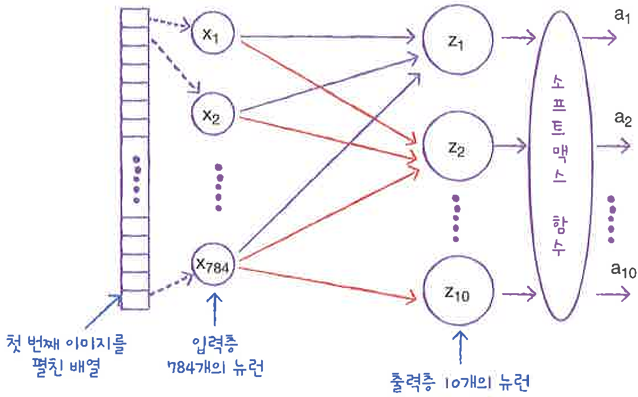

- 활성화 함수: 소프트맥스와 같이 뉴련의 선형 방정식 계산 결과에 적용되는 함수

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- compile(): 케라스 모델은 훈련하기 전에 설정 단계가 있는데 꼭 손실함수의 종류를 지정해야 한다.
- 이진 분류: loss = 'binary_crossentropy'
- 다중 분류: loss = 'categorical_crossentropy'
- 'sparse_categorical_crossentropy': 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것 -> 텐서플로에서 이렇게 설정하면 변환을 수행할 필요가 없다.

- 원-핫 인코딩: 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것
- 다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위해서 변환이 필요하다.

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7352 - loss: 0.7833
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8371 - loss: 0.4804
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8457 - loss: 0.4514
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8490 - loss: 0.4445
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8558 - loss: 0.4281


In [ ]:
model.evaluate(val_scaled, val_target) #케라스에서 모델의 성능을 평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8484 - loss: 0.4330


[0.43975406885147095, 0.8477500081062317]

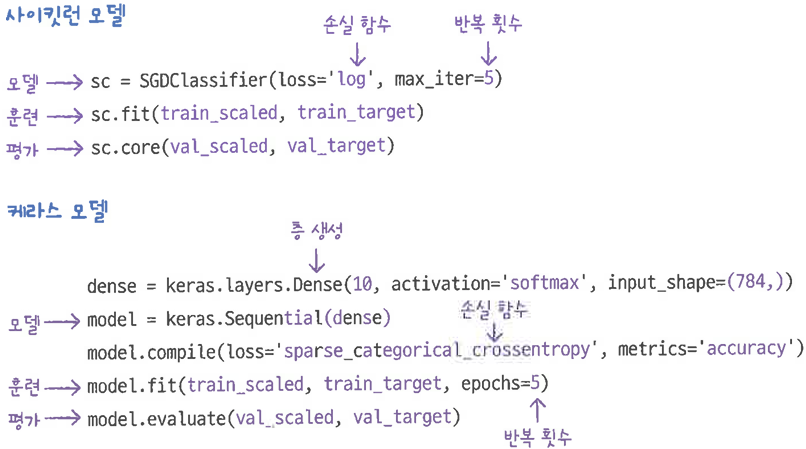

#7-2. 심층 신경망

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state=42)

- 은닉층: 입력층과 출력층 사이에 있는 모든 층
- 출력층에 적용하는 활성화 함수는 종류가 제한되어 있지만 은닉층의 활성화 함수는 자유롭다.

In [3]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- 100개의 뉴런, 활성화 함수는 sigmoid, 입력의 크기는 (784,)
- 은닉층의 뉴런은 출력층의 뉴런보다 많이 만들어야 한다.

In [4]:
model = keras.Sequential([dense1, dense2])

- 여러 개의 층을 추가하려면 은닉층에서 마지막 출력층의 순서로 나열해야 한다.

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model = keras.Sequential(
    [keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),name='hidden'),
    keras.layers.Dense(10, activation='softmax',name='output')],
    name = '패션 MNIST 모델')

- 굳이 dense1, dense2로 쓰지 않고 Sequential클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 더 많다.

In [7]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7536 - loss: 0.7735
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8507 - loss: 0.4176
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8649 - loss: 0.3717
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8733 - loss: 0.3536
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8784 - loss: 0.3358


##렐루 함수
: 입력이 양수일 경우 마치 활성화 함수가 없는  것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만든다.
- 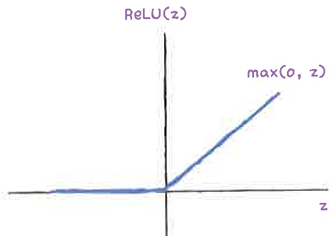
- 이미지 처리에서 좋은 성능을 낸다.

In [11]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할
- 인공 신경망의 성능을 위해 기여하는 역할은 X
- Flatten 층은 입력층 바로 뒤에 추가한다.

In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 케라스 API는 입력 데이터에 대한 전처리 과정을 될 수 있으면 모델에 포함한다.

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7650 - loss: 0.6711
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8543 - loss: 0.4002
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8697 - loss: 0.3585
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8848 - loss: 0.3246
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8854 - loss: 0.3108


In [20]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8770 - loss: 0.3749


[0.3703625798225403, 0.8761666417121887]

##옵티마이저